# Домашнее задание к лекции "Статистика. Практика"
### Задание 1
Вернемся к набору данных о видеоиграх.
https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv

Ответьте на следующие вопросы:
- Как критики относятся к спортивным играм?
- Критикам нравятся больше игры на PC или на PS4?
- Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
games = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games_critics = games[games['Genre'] == 'Sports'][['Name','Critic_Score']]
games_critics

,Name,Critic_Score
0,Wii Sports,76.0
3,Wii Sports Resort,80.0
13,Wii Fit,80.0
15,Wii Fit Plus,80.0
77,FIFA 16,82.0
...,...,...
16680,G1 Jockey 4 2008,NaN
16692,Outdoors Unleashed: Africa 3D,NaN
16697,PGA European Tour,NaN
16704,Mezase!! Tsuri Master DS,NaN


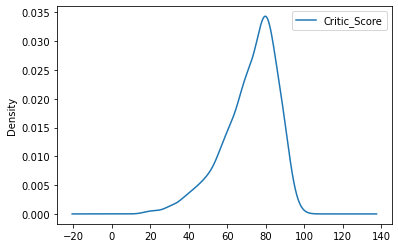

In [5]:
games_critics.plot(kind='density', label='Critics_score_for_sportgames')
plt.legend()

In [6]:
games_critics.dropna(subset=['Critic_Score'], inplace=True)

In [7]:
games_critics['Critic_Score']

0        76.0
3        80.0
13       80.0
15       80.0
77       82.0
         ... 
16456    78.0
16478    57.0
16532    78.0
16550    78.0
16555    88.0
Name: Critic_Score, Length: 1194, dtype: float64

### Уровень значимости везде принимаем alpha = 0.05 

## Как критики относятся к спортивным играм?

H0: средняя оценка критиков спортивными играми >= 75%

H1: средняя оценка критиков спортивными играми менее 75%

Односторонний тест, т.к. интересует только неравенство в одну=меньшую сторону

In [8]:
games_critics['Critic_Score']

0        76.0
3        80.0
13       80.0
15       80.0
77       82.0
         ... 
16456    78.0
16478    57.0
16532    78.0
16550    78.0
16555    88.0
Name: Critic_Score, Length: 1194, dtype: float64

In [9]:
alpha = 0.05
result = st.ttest_1samp(games_critics['Critic_Score'], 75, alternative='less')

print(games_critics.mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее меньше 75 (продукция не нравится)')
else:
    print('Не отвергаем  нулевую гипотезу, критикам нравятся спортивные игры')

Critic_Score    71.968174
dtype: float64
Ttest_1sampResult(statistic=-7.5485926388546725, pvalue=4.353818251173934e-14)
Отвергаем нулевую гипотезу, среднее меньше 75 (продукция не нравится)


## Критикам нравятся больше игры на PC или на PS4?

H0: средняя оценка критиков играми на РС и на PS4 - одинакова

H1: средняя оценка критиков играми на РС и на PS4 - различается

In [10]:
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
games_critics_platforms = games[(games['Platform'] == 'PS4')|(games['Platform'] == 'PC')][['Platform','Critic_Score']]
games_critics_platforms.dropna(subset=['Critic_Score'], inplace=True)

In [12]:
PS4 = games_critics_platforms[games_critics_platforms['Platform']=='PS4']['Critic_Score']
PC = games_critics_platforms[games_critics_platforms['Platform']=='PC']['Critic_Score']
PC

85       86.0
138      93.0
192      88.0
218      93.0
284      96.0
         ... 
16644    51.0
16696    80.0
16700    61.0
16706    60.0
16709    63.0
Name: Critic_Score, Length: 715, dtype: float64

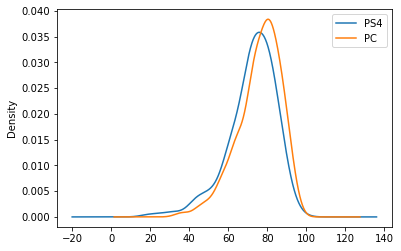

In [13]:
PS4.plot(kind='density', label='PS4')
PC.plot(kind='density', label='PC')
plt.legend()

In [14]:
alpha = 0.05
result = st.ttest_ind(PC, PS4, equal_var=False)

print('PS4mean:',PS4.mean())
print('PCmean:',PC.mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к PS4 и к PC')
else:
    print('Не отвергаем  нулевую гипотезу')

PS4mean: 72.09126984126983
PCmean: 75.92867132867133
Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Отвергаем нулевую гипотезу, клиенты по разному относятся к PS4 и к PC


Судя по средним значениям PC ставят оценки выше, чем PS4

## Критикам больше нравятся стрелялки или стратегии?

H0: средняя оценка критиков у стрелялок больше или равна, чем у стратегий

H1: средняя оценка критиков у стрелялок меньше, чем у стратегий

In [15]:
games_critics_genre = games[(games['Genre'] == 'Action')|(games['Genre'] == 'Strategy')][['Genre','Critic_Score']]
games_critics_genre.dropna(subset=['Critic_Score'], inplace=True)

In [16]:
A2 = games_critics_genre[games_critics_genre['Genre']=='Action']['Critic_Score']
B2 = games_critics_genre[games_critics_genre['Genre']=='Strategy']['Critic_Score']

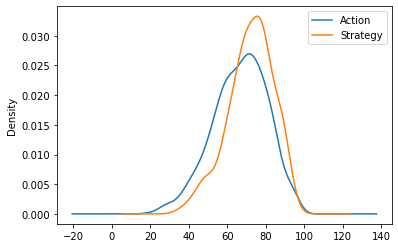

In [17]:
A2.plot(kind='density', label='Action')
B2.plot(kind='density', label='Strategy')
plt.legend()

C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Critic_Score'>

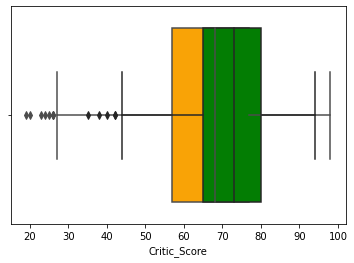

In [18]:
sns.boxplot(A2, color='orange', saturation=0.95)
sns.boxplot(B2, color='green', saturation=0.95)

In [19]:
alpha = 0.05
result = st.ttest_ind(A2, B2, equal_var=False)

print('Action:',A2.mean())
print('Strategy:',B2.mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к Action и к Strategy')
else:
    print('Не отвергаем  нулевую гипотезу')

Action: 66.62910052910053
Strategy: 72.08609271523179
Ttest_indResult(statistic=-7.227463722198437, pvalue=2.111658178046176e-12)
Отвергаем нулевую гипотезу, клиенты по разному относятся к Action и к Strategy


Судя по средним значениям Strategy ставят оценки выше, чем Action

### Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

- 1 Привидите весь текст к нижнему регистру;
- 2 Удалите мусорные символы;
- 3 Удалите стоп-слова;
- 4 Привидите все слова к нормальной форме;
- 5 Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

- tfidf = TfidfVectorizer()
- tfidf_matrix = tfidf.fit_transform(df.Message)
- names = tfidf.get_feature_names()
- tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
- Можете поэкспериментировать с параметрами TfidfVectorizer;


- 6 Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
- 7 Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
- 8 Опишите результаты при помощи confusion_matrix;
- 9 Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [20]:
import re
import glob

In [21]:
messages = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
messages

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### 1 Привидите весь текст к нижнему регистру;


In [22]:
analytics_messages = messages
analytics_messages['Message'] = [sms.lower() for sms in analytics_messages['Message']]
analytics_messages

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### 2 Удалите мусорные символы;

In [23]:
analytics_messages['Message'] = [re.sub('[\W_]+',' ', text) for text in analytics_messages['Message']]
analytics_messages

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


### 3 Удалите стоп-слова;

In [24]:
# разделим все на слова
analytics_messages['Message'] = [text.split() for text in analytics_messages['Message']]
analytics_messages

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...
5567,spam,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords_set = set(stopwords.words('english'))
analytics_messages['Message'] = [[word for word in text if word not in stopwords_set] for text in analytics_messages['Message']]
analytics_messages

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


### 4 Привидите все слова к нормальной форме;

In [341]:
from nltk.stem import WordNetLemmatizer

In [342]:
wordnet_lemmatizer = WordNetLemmatizer()
analytics_messages['Message'] = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in analytics_messages['Message']]
analytics_messages

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestion]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


### 5 Преобразуйте все сообщения в вектора TF-IDF.

In [343]:
from gensim import corpora

In [344]:
# создадим словарь, в котором присвоем каждому словую свой уникальный id
dictionary = corpora.Dictionary(analytics_messages['Message'])
dict(dictionary)

{0: 'amore',
 1: 'available',
 2: 'buffet',
 3: 'bugis',
 4: 'cine',
 5: 'crazy',
 6: 'e',
 7: 'go',
 8: 'got',
 9: 'great',
 10: 'jurong',
 11: 'la',
 12: 'n',
 13: 'point',
 14: 'wat',
 15: 'world',
 16: 'joking',
 17: 'lar',
 18: 'ok',
 19: 'oni',
 20: 'u',
 21: 'wif',
 22: '08452810075over18',
 23: '2',
 24: '2005',
 25: '21st',
 26: '87121',
 27: 'apply',
 28: 'c',
 29: 'comp',
 30: 'cup',
 31: 'entry',
 32: 'fa',
 33: 'final',
 34: 'free',
 35: 'may',
 36: 'question',
 37: 'rate',
 38: 'receive',
 39: 'std',
 40: 'text',
 41: 'tkts',
 42: 'txt',
 43: 'win',
 44: 'wkly',
 45: 'already',
 46: 'dun',
 47: 'early',
 48: 'hor',
 49: 'say',
 50: 'around',
 51: 'life',
 52: 'nah',
 53: 'think',
 54: 'though',
 55: 'usf',
 56: '1',
 57: '3',
 58: '50',
 59: 'back',
 60: 'chgs',
 61: 'darling',
 62: 'freemsg',
 63: 'fun',
 64: 'hey',
 65: 'like',
 66: 'rcv',
 67: 'send',
 68: 'still',
 69: 'tb',
 70: 'week',
 71: 'word',
 72: 'xxx',
 73: 'aid',
 74: 'brother',
 75: 'even',
 76: 'patent',


In [345]:
analytics_messages['bows'] = [dictionary.doc2bow(text) for text in analytics_messages['Message']]
analytics_messages

,Category,Message,bows
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,ham,"[ok, lar, joking, wif, u, oni]","[(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), ..."
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), ..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[(20, 2), (28, 1), (45, 1), (46, 1), (47, 1), ..."
4,ham,"[nah, think, go, usf, life, around, though]","[(7, 1), (50, 1), (51, 1), (52, 1), (53, 1), (..."
...,...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[(20, 2), (23, 2), (37, 1), (88, 1), (96, 1), ..."
5568,ham,"[ü, b, going, esplanade, fr, home]","[(125, 1), (199, 1), (222, 1), (229, 1), (1173..."
5569,ham,"[pity, mood, suggestion]","[(4831, 1), (7937, 1), (8080, 1)]"
5570,ham,"[guy, bitching, acted, like, interested, buyin...","[(20, 1), (34, 1), (65, 1), (70, 1), (183, 1),..."


In [346]:
# соединим все слова в строку в сообщении
analytics_messages['Message'] = [' '.join(text) for text in analytics_messages['Message']]
analytics_messages

,Category,Message,bows
0,ham,go jurong point crazy available bugis n great ...,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,ham,ok lar joking wif u oni,"[(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), ..."
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), ..."
3,ham,u dun say early hor u c already say,"[(20, 2), (28, 1), (45, 1), (46, 1), (47, 1), ..."
4,ham,nah think go usf life around though,"[(7, 1), (50, 1), (51, 1), (52, 1), (53, 1), (..."
...,...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,"[(20, 2), (23, 2), (37, 1), (88, 1), (96, 1), ..."
5568,ham,ü b going esplanade fr home,"[(125, 1), (199, 1), (222, 1), (229, 1), (1173..."
5569,ham,pity mood suggestion,"[(4831, 1), (7937, 1), (8080, 1)]"
5570,ham,guy bitching acted like interested buying some...,"[(20, 1), (34, 1), (65, 1), (70, 1), (183, 1),..."


In [350]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(analytics_messages['Message'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6 Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

In [351]:
from sklearn.model_selection import train_test_split

In [360]:
X_train, X_test, y_train, y_test= train_test_split(tfidf_matrix, analytics_messages['Category'], test_size=0.3, random_state=42)

In [404]:
X_train

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [405]:
X_test

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
3245,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2484,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4975,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
650,0.0,0.566635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 7 Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

In [359]:
from sklearn.linear_model import LogisticRegression

In [379]:
model = LogisticRegression(random_state=42).fit(X_test, y_test)

In [397]:
y_predict = model.predict(X_test)
y_predict

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [395]:
# оценка точности модели на тестовых данных
model.score(X_test, y_test)

0.9431818181818182

### 8 Опишите результаты при помощи confusion_matrix;

In [396]:
from sklearn.metrics import confusion_matrix

In [402]:
confusion_matrix(y_test, y_predict, labels=['spam', 'ham'])

array([[ 130,   94],
       [   1, 1447]], dtype=int64)

### Выводы

Подводя итоги 

- 1447 писем модель верно предсказала как ham
- 94 писем модель посчитала как spam, но на самом деле это обычные(ham) письма (ошибка 1 рода)
- 1 письмо посчитала как не спам(т.е. ham), но на самом деле это спам (ошибка 2 рода)
- 130 писем модель определила как spam

PS (честно говоря, попытался из Slack и википедии как-то интерпретировать - возмножно, мог ошибиться в том, как работает) - поправьте, пожалуйста, если не прав. Составил матрицу 2*2 (spam, ham -строка факта, столбец прогноза spam, ham ) а их пересечение результат интерпретации

### 9 Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [415]:
analytics_messages['Predict_Category'] = pd.Series(y_predict)
analytics_messages_final = analytics_messages[['Category', 'Predict_Category', 'Message']]
analytics_messages_final.head(50)

,Category,Predict_Category,Message
0,ham,ham,go jurong point crazy available bugis n great ...
1,ham,ham,ok lar joking wif u oni
2,spam,ham,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,ham,u dun say early hor u c already say
4,ham,ham,nah think go usf life around though
5,spam,ham,freemsg hey darling 3 week word back like fun ...
6,ham,ham,even brother like speak treat like aid patent
7,ham,ham,per request melle melle oru minnaminunginte nu...
8,spam,ham,winner valued network customer selected receiv...
9,spam,ham,mobile 11 month u r entitled update latest col...


### PS такое ощущение что-то не то, потому как много предсказаний не совпало, и тесты же брались не по порядку, а случайно, не понимаю как можно сопоставить их